# Modeling problem report - Banking Marketing Data

## 1. Introduction

### 1.1 Abstract

The aim of this report is to discuss how machine learning models can be used to analyse and make predictions using a dataset from the banking marketing field. The purpose of the research described by the report is to find out how models can be used together in the process of transforming raw data into a decision-making. Building predictive models will help predict whether a customer will sign up for a term deposit.

The data comes from the research focused on targeting through telemarketing phone calls to sell long- term deposits. Within a campaign, the human agents execute phone calls to a list of clients to sell the deposit (outbound) or, if meanwhile the client calls the contact-center for any other reason, he is asked to subscribe the deposit (inbound). Thus, the result is a binary unsuccessful or successful contact. 

### 1.2 Problem/task desription

The classification goal of the research is to predict if the client will subscribe a term deposit (variable y). The first step of the proposed solution was to identify the problem, collect and describe the dataset. The second and third steps are to explore, clean and prepare the data. The fourth step of the process is to choose and build the machine learning models. The fifth step is to test and evaluate the performance of the models. Report ends with summary on encouters problems. Facility used is Python programming and Python environment facility (Jupyter notebook).

### 1.3 Desciption of target variable

Output variable (desired target) is a binary variable y ('yes','no') describing if the client subscribed a term deposit('yes','no').

### 1.4 Rationale behind picking particular task and target

There are various machine learning techniques used in exploring dataset in banking marking to create efficient decision making knowledge. The experiments already carried out have shown that random best results has achieved after applying classification algorithms such as Logistic Regression, Decision Tree, Random Forest, and Naïve Bayes. Therefore, the first three models cited were selected for the preparation of this report.

### 1.5 Features explanation

Features include attributes as: client information related to his/her characteristics (e.g., age), telemarketing attributes related with the last contact of the current campaign and other attributes (e.g. last contact month of year, number of contacts performed during this campaign and for this client). These data were enriched with social and economic influence features (e.g., employment variation rate), by gathering external data from the central bank of the Portuguese Republic statistical web site. These features are explaind in detail below:

#Bank client data:  
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  

#Related with the last contact of the current campaign:  
8 - contact: contact communication type (categorical: 'cellular','telephone')   
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

#Other attributes:  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

#Social and economic context attributes  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)    
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric) 

### 1.6 Dataset description

Process of empirical analysis of the bank marketing data was carried out on basis of marketing data related with direct telemarketing campaigns of a Portuguese banking institution. 
The necessary dataset for the analysis was obtained from the UCI (University of California, Irvine) Machine Learning Repository which collects i.e. databases as a service to the machine learning community for the analysis of machine learning algorithms. 
The data comprises a total of 41 188 phone calls. The data is ordered by date in the range from May 2008 to November 2010 which is very close to the data collected from May 2008 to June 2013 from a Portuguese retail bank and analyzed in [Moro et al., 2014]. The data reflects the effects of the global financial crisis that occurred in 2008. The data was stored in bank-additional-full.csv  and donated to the Repository on 14 February 2012. 

## 2. Cleaning and preprocessing data 

removing or imputing missing data, standarization, one-hot encoding, handling outliers, feature extraction, merging categories etc. (some of these points may go to part 3 if EDA/exploration was the cause of particular action)

### 2.1 Loading the data 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
# Accessing the data
df = pd.read_csv("/Users/cezaryrosa/Desktop/SLM/bank-additional/bank-additional-full.csv", delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2 Studying structure of the data and finding missing values 

In [4]:
# Studying the structure of data: data type, number of columns, entries, null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are 9 categorical explanatory variables and 1 categorical target variable.
There are 10 numerical explanatory variables including 5 integer variables and 5 floating point type variables.

In [5]:
#Separating numerical variables and categorical variables
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [6]:
df[num_vars]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [7]:
df[cat_vars]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [8]:
#Finding missing data in numerical variables
df[num_vars].isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [8]:
#Finding missing data in categorical variables
df[cat_vars].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64

There is no missing values, therefore dropping data is not needed.

### 2.3 Target variable: separating, recoding, checking imbalanced structure

In [9]:
# Separating independent variables and a dependent (target) variable
X = df.iloc[ : , :-1].values
y = df.iloc[ : , 20].values

In [10]:
# Recoding a target variable
df.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [11]:
# Checking the imbalanced structure of target variable
df['y'].value_counts()
df['y'].value_counts(normalize = True)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

Data is unbalanced 89%:11%

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### 2.4 Feature extractions and encoding

In [13]:
#Creating dataframe related to client information

client_info_df = df.iloc[: , 0:7]
client_info_df

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [14]:
#Knowing the categorical variables in client information dataframe

print('jobs:\n', client_info_df['job'].unique(), '\n')

print('marital:\n', client_info_df['marital'].unique(), '\n')

print('education:\n', client_info_df['education'].unique(), '\n')

print('default:\n', client_info_df['default'].unique(), '\n')

print('housing:\n', client_info_df['housing'].unique(), '\n')

print('loan:\n', client_info_df['loan'].unique(), '\n')

jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital:
 ['married' 'single' 'divorced' 'unknown'] 

education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default:
 ['no' 'unknown' 'yes'] 

housing:
 ['no' 'yes' 'unknown'] 

loan:
 ['no' 'yes' 'unknown'] 



In [36]:
#Encoding categorical variables in integer and merging if needed

client_info_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
client_info_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
client_info_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)
client_info_df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
client_info_df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
client_info_df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

In [37]:
client_info_df.head()

,age,job,marital,education,default,housing,loan
0,56,1,1,1,2,2,2
1,57,2,1,2,3,2,2
2,37,2,1,2,2,1,2
3,40,3,1,3,2,2,2
4,56,2,1,2,2,2,1


In [38]:
#Creating dataframe related to telemarketing information
telemarketing_info_df = df.iloc[: , 7:11]
telemarketing_info_df

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442


In [39]:
#Knowing the categorical variables in telecomunication information dataframe

print('contact:\n', telemarketing_info_df['contact'].unique(), '\n')

print('month:\n', telemarketing_info_df['month'].unique(), '\n')

print('day_of_week:\n', telemarketing_info_df['day_of_week'].unique(), '\n')

contact:
 ['telephone' 'cellular'] 

month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri'] 



In [40]:
#Encoding categorical variables in integer and merging if needed
telemarketing_info_df['contact'].replace(['telephone', 'cellular'],[1, 2], inplace=True)
telemarketing_info_df['month'].replace(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov','dec'],[3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
telemarketing_info_df['day_of_week'].replace(['mon','tue','wed','thu','fri'],[1, 2, 3, 4, 5], inplace=True)

In [41]:
telemarketing_info_df.head()

,contact,month,day_of_week,duration
0,1,5,1,261
1,1,5,1,149
2,1,5,1,226
3,1,5,1,151
4,1,5,1,307


In [42]:
#Creating dataframe related to other information
other_info_df = df.iloc[: ,11:15]
other_info_df

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


In [43]:
#Knowing the categorical variables in telecomunication information dataframe

print('poutcome:\n', other_info_df['poutcome'].unique(), '\n')

poutcome:
 ['nonexistent' 'failure' 'success'] 



In [44]:
#Encoding categorical variables in integer and merging if needed
other_info_df['poutcome'].replace(['nonexistent', 'failure', 'success'],[1, 2,3], inplace=True)

In [45]:
other_info_df.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


In [46]:
#Creating dataframe related to socio-economical information
socioecono_info_df = df.iloc[: ,15:20]
socioecono_info_df

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


In [47]:
#Creating dataframe related to socio-economical information
socioecono_info_df = df.iloc[: ,15:20]
socioecono_info_df

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


In [48]:
#Creating a final dataset after encoding categorical variables
df_final= pd.concat([client_info_df, telemarketing_info_df, other_info_df, socioecono_info_df], axis = 1)

In [49]:
df_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,1,1,2,2,2,1,5,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,2,1,2,3,2,2,1,5,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,2,1,2,2,1,2,1,5,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,3,1,3,2,2,2,1,5,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,2,1,2,2,2,1,1,5,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,2,1,2,2,11,5,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,4,1,5,2,2,2,2,11,5,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,6,1,7,2,1,2,2,11,5,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,5,1,5,2,2,2,2,11,5,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.5 One-hot encoding example

In [51]:
# Example of one-hot encoding of client-related dataset

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
client_info_encod_df = encoder.fit_transform(client_info_df)
print(client_info_encod_df)

[[39.  0.  0. ...  1.  1.  1.]
 [40.  1.  0. ...  2.  1.  1.]
 [20.  1.  0. ...  1.  0.  1.]
 ...
 [39.  5.  0. ...  1.  0.  1.]
 [27.  4.  0. ...  1.  1.  1.]
 [57.  5.  0. ...  1.  0.  1.]]


### 2.6 Spliting dataset into train and test datasets

In [52]:
#Spliting dataset into train and test datasets with train size 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final,y,test_size = 0.8, random_state = 1)

In [32]:
X_train.shape

(8237, 20)

In [53]:
y_train.shape

(8237,)

### 2.7 Standardizing the data

In [87]:
# Standardization of dependent variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
X_train, y_train

(array([[-1.24750369, -0.68719031,  0.71230104, ..., -0.46924128,
          0.7761169 ,  0.84614726],
        [-0.19321343, -0.2794696 , -0.7253916 , ..., -0.46924128,
          0.77553934,  0.84614726],
        [ 0.57354311, -0.2794696 , -0.7253916 , ..., -0.46924128,
          0.7761169 ,  0.84614726],
        ...,
        [-0.38490257, -0.2794696 , -0.7253916 , ...,  0.89131302,
          0.71547263,  0.33296867],
        [-0.289058  , -0.68719031, -0.7253916 , ..., -0.46924128,
          0.77207395,  0.84614726],
        [-0.48074714, -0.2794696 ,  0.71230104, ..., -1.22510477,
         -1.33950206, -0.93822035]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=object))

## 3. Exploratory Data Analysis (EDA)

EDA (both graphical e.g. barplots, scatterplots and descriptive e.g. tables with statistics) with focus on exploring relations between features and target variable; include correlation matrix/heatmap between numerical variables; use one of the clustering (e.g. k-means, hierarchical clustering) or dimensionality reduction technique (e.g. PCA, t-SNE, UMAP) to derive additional insight from data

### 3.1 Descriptive statistics

In [56]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### 3.2 Boxplots

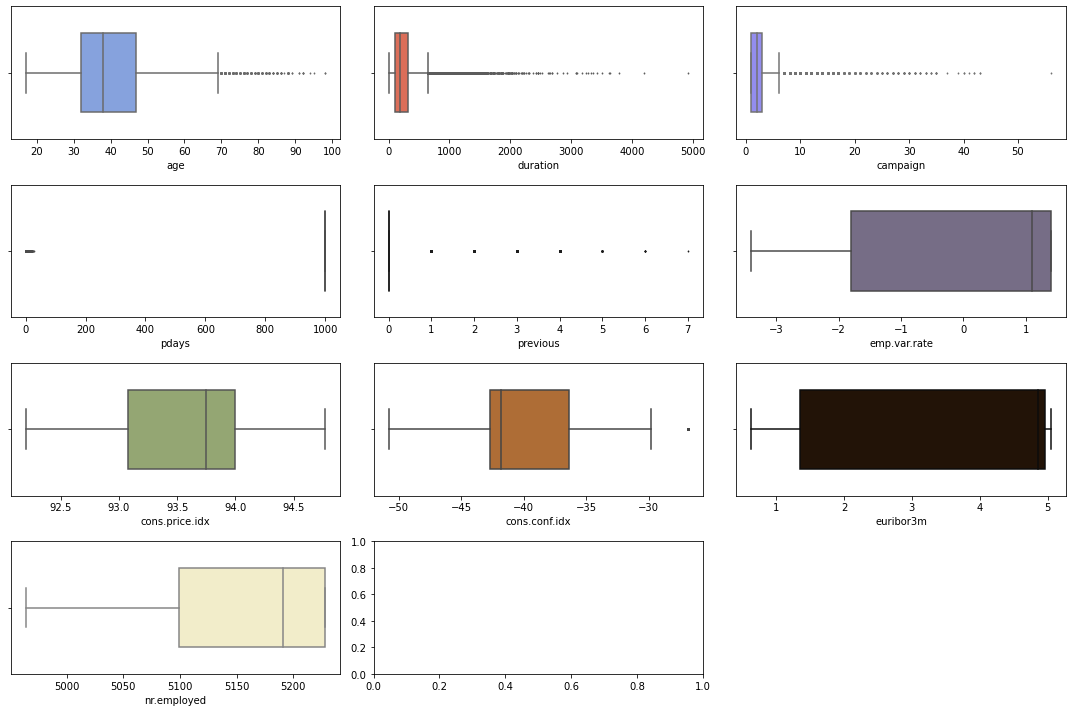

In [57]:
fig, axes = plt.subplots(4,3,figsize=[15,10])
for i, col in enumerate(num_vars):
    sns.boxplot(x=col,color=np.random.rand(3,), data=df, ax=axes[i//3,i%3],fliersize=1,width=0.6)
fig.delaxes(axes[3,2])
plt.tight_layout()

### 3.3 Handling outliers

Based on the above box plots we can see that Age, Duration and Campaign variables can have significant portion of missing variables. The next step is to check the proportion of missing data in the dataset.

In [58]:
print('Ages above', 47 + 1.5* (47-32), 'are outliers')
print('Duration above', 319 + 1.5* (319-102), 'are outliers')
print('Campaign above', 3 + 1.5* (3-1), 'are outliers')

Ages above 69.5 are outliers
Duration above 644.5 are outliers
Campaign above 6.0 are outliers


In [59]:
print('Number of outliers for Age: ', client_info_df[client_info_df['age'] > 69.5]['age'].count())
print('Number of outliers for Duration: ', telemarketing_info_df[telemarketing_info_df['duration'] > 644.5]['duration'].count())
print('Number of outliers for Campaign: ', other_info_df[other_info_df['campaign'] > 6]['campaign'].count())
print('Number of clients: ', len(client_info_df))
print('Outliers for Age are:', round(client_info_df[client_info_df['age'] > 69.5]['age'].count()*100/len(client_info_df),2), '%')
print('Outliers for Duration are:', round(telemarketing_info_df[telemarketing_info_df['duration'] > 644.5]['duration'].count()*100/len(telemarketing_info_df),2), '%')
print('Outliers for Campaign are: ', round(other_info_df[other_info_df['campaign'] > 6]['campaign'].count()*100/len(other_info_df),2), '%')

Number of outliers for Age:  469
Number of outliers for Duration:  2963
Number of outliers for Campaign:  2406
Number of clients:  41188
Outliers for Age are: 1.14 %
Outliers for Duration are: 7.19 %
Outliers for Campaign are:  5.84 %


Based on the low percetages of missing data in the dataset from 1.14% to 7.19%, none of the data were eliminated. 

### 3.4 Bar plots

/Users/cezaryrosa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/cezaryrosa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/cezaryrosa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/cezaryrosa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/cezaryrosa/opt/anacon

KeyError: <AxesSubplot:>

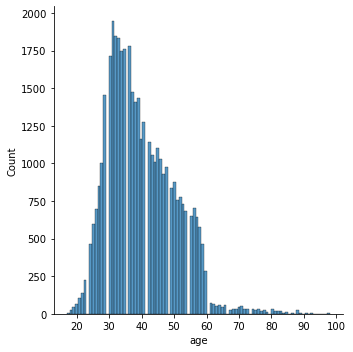

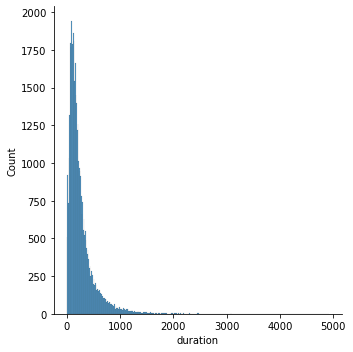

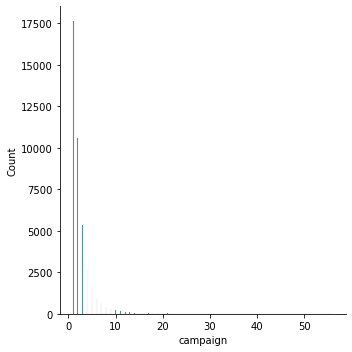

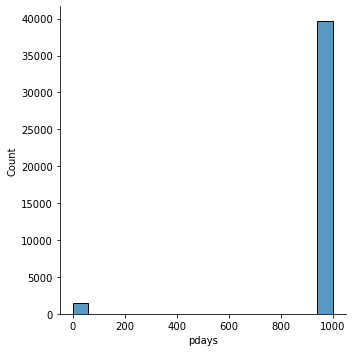

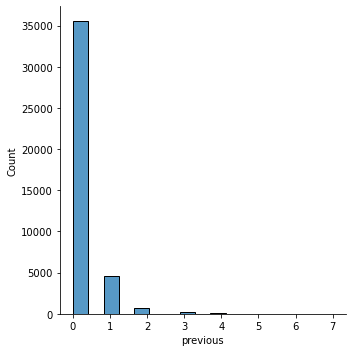

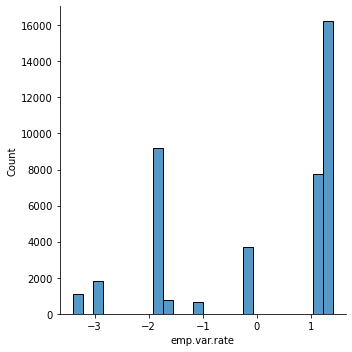

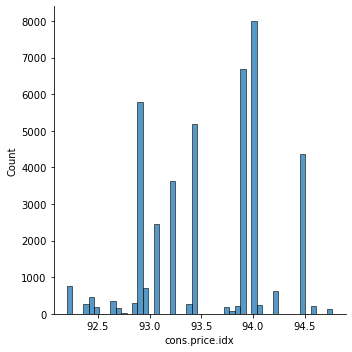

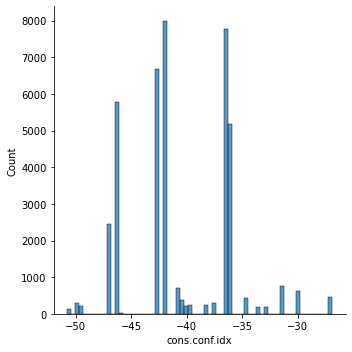

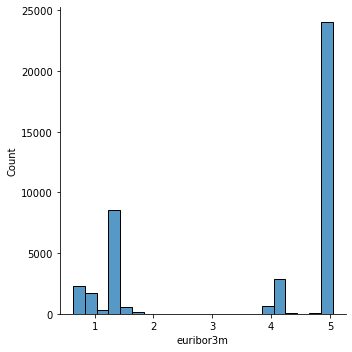

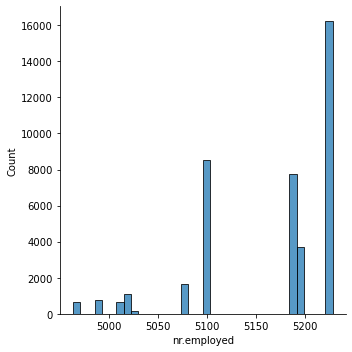

In [60]:
for i, col in enumerate(num_vars):
    sns.displot(df[col],ax=axes[i//3,i%3])
fig.delaxes(axes[3,2])
plt.tight_layout()

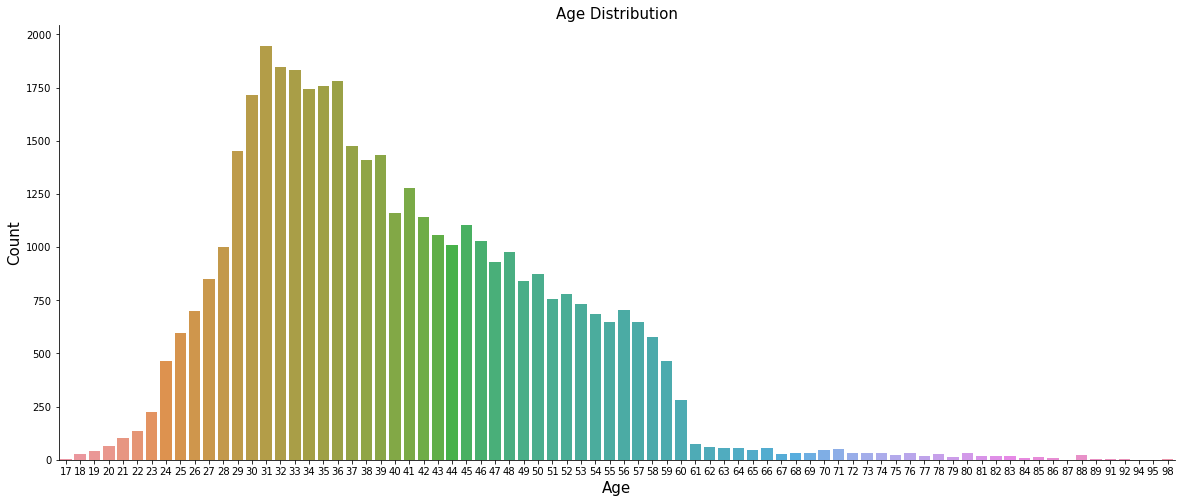

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = client_info_df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

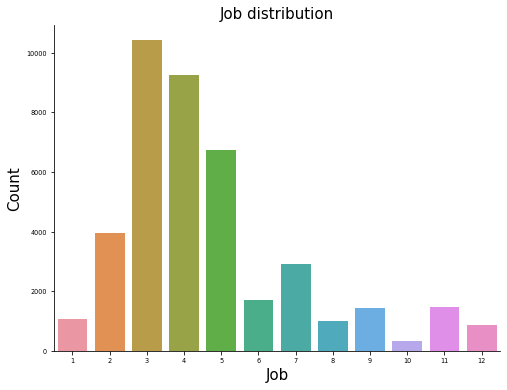

In [61]:
fig, ax = plt.subplots(figsize=[8,6])
sns.countplot(x = 'job', data = client_info_df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job distribution', fontsize=15)
ax.tick_params(labelsize=6.5)
sns.despine()

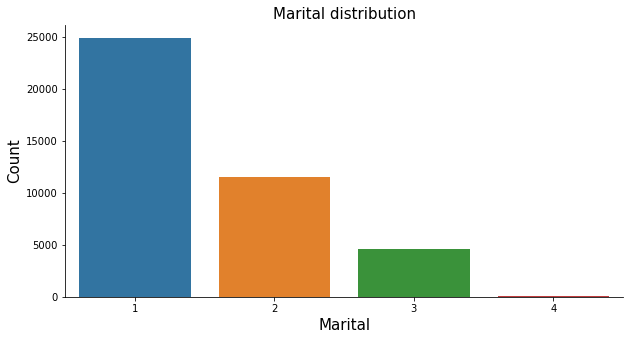

In [62]:
fig, ax = plt.subplots(figsize=[10,5])
sns.countplot(x = 'marital', data = client_info_df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

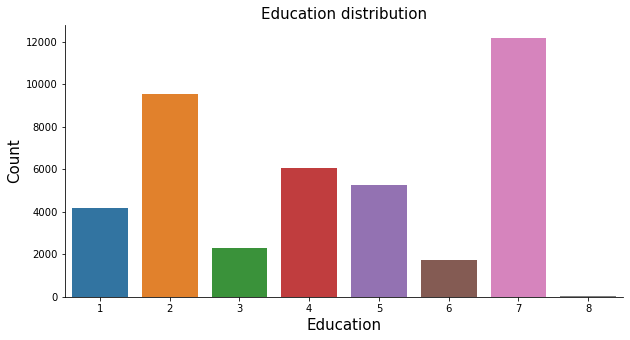

In [63]:
fig, ax = plt.subplots(figsize=[10,5])
sns.countplot(x = 'education', data = client_info_df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

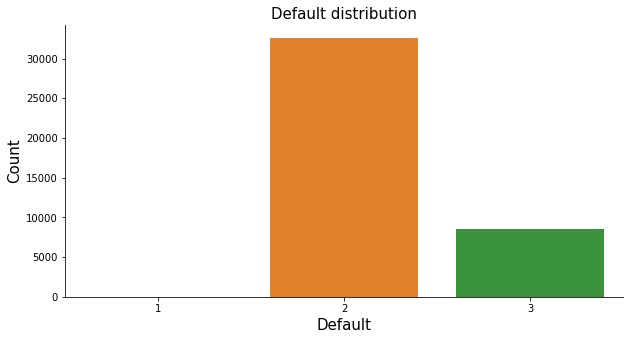

In [64]:
fig, ax = plt.subplots(figsize=[10,5])
sns.countplot(x = 'default', data = client_info_df)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

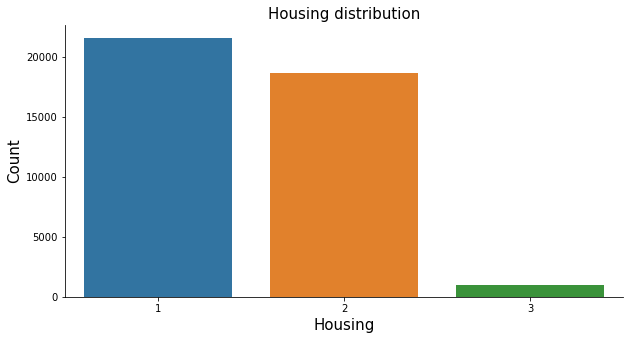

In [65]:
fig, ax = plt.subplots(figsize=[10,5])
sns.countplot(x = 'housing', data = client_info_df)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

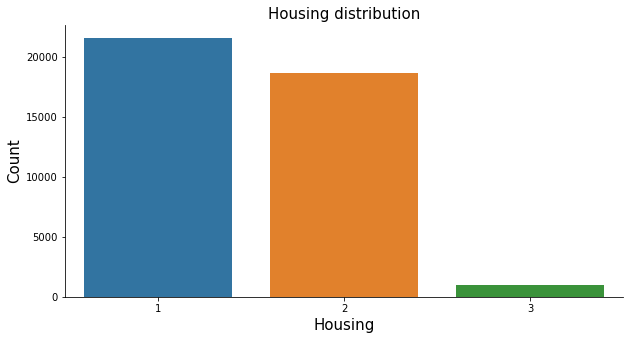

In [66]:
fig, ax = plt.subplots(figsize=[10,5])
sns.countplot(x = 'housing', data = client_info_df)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

### 3.5 Scatterplots

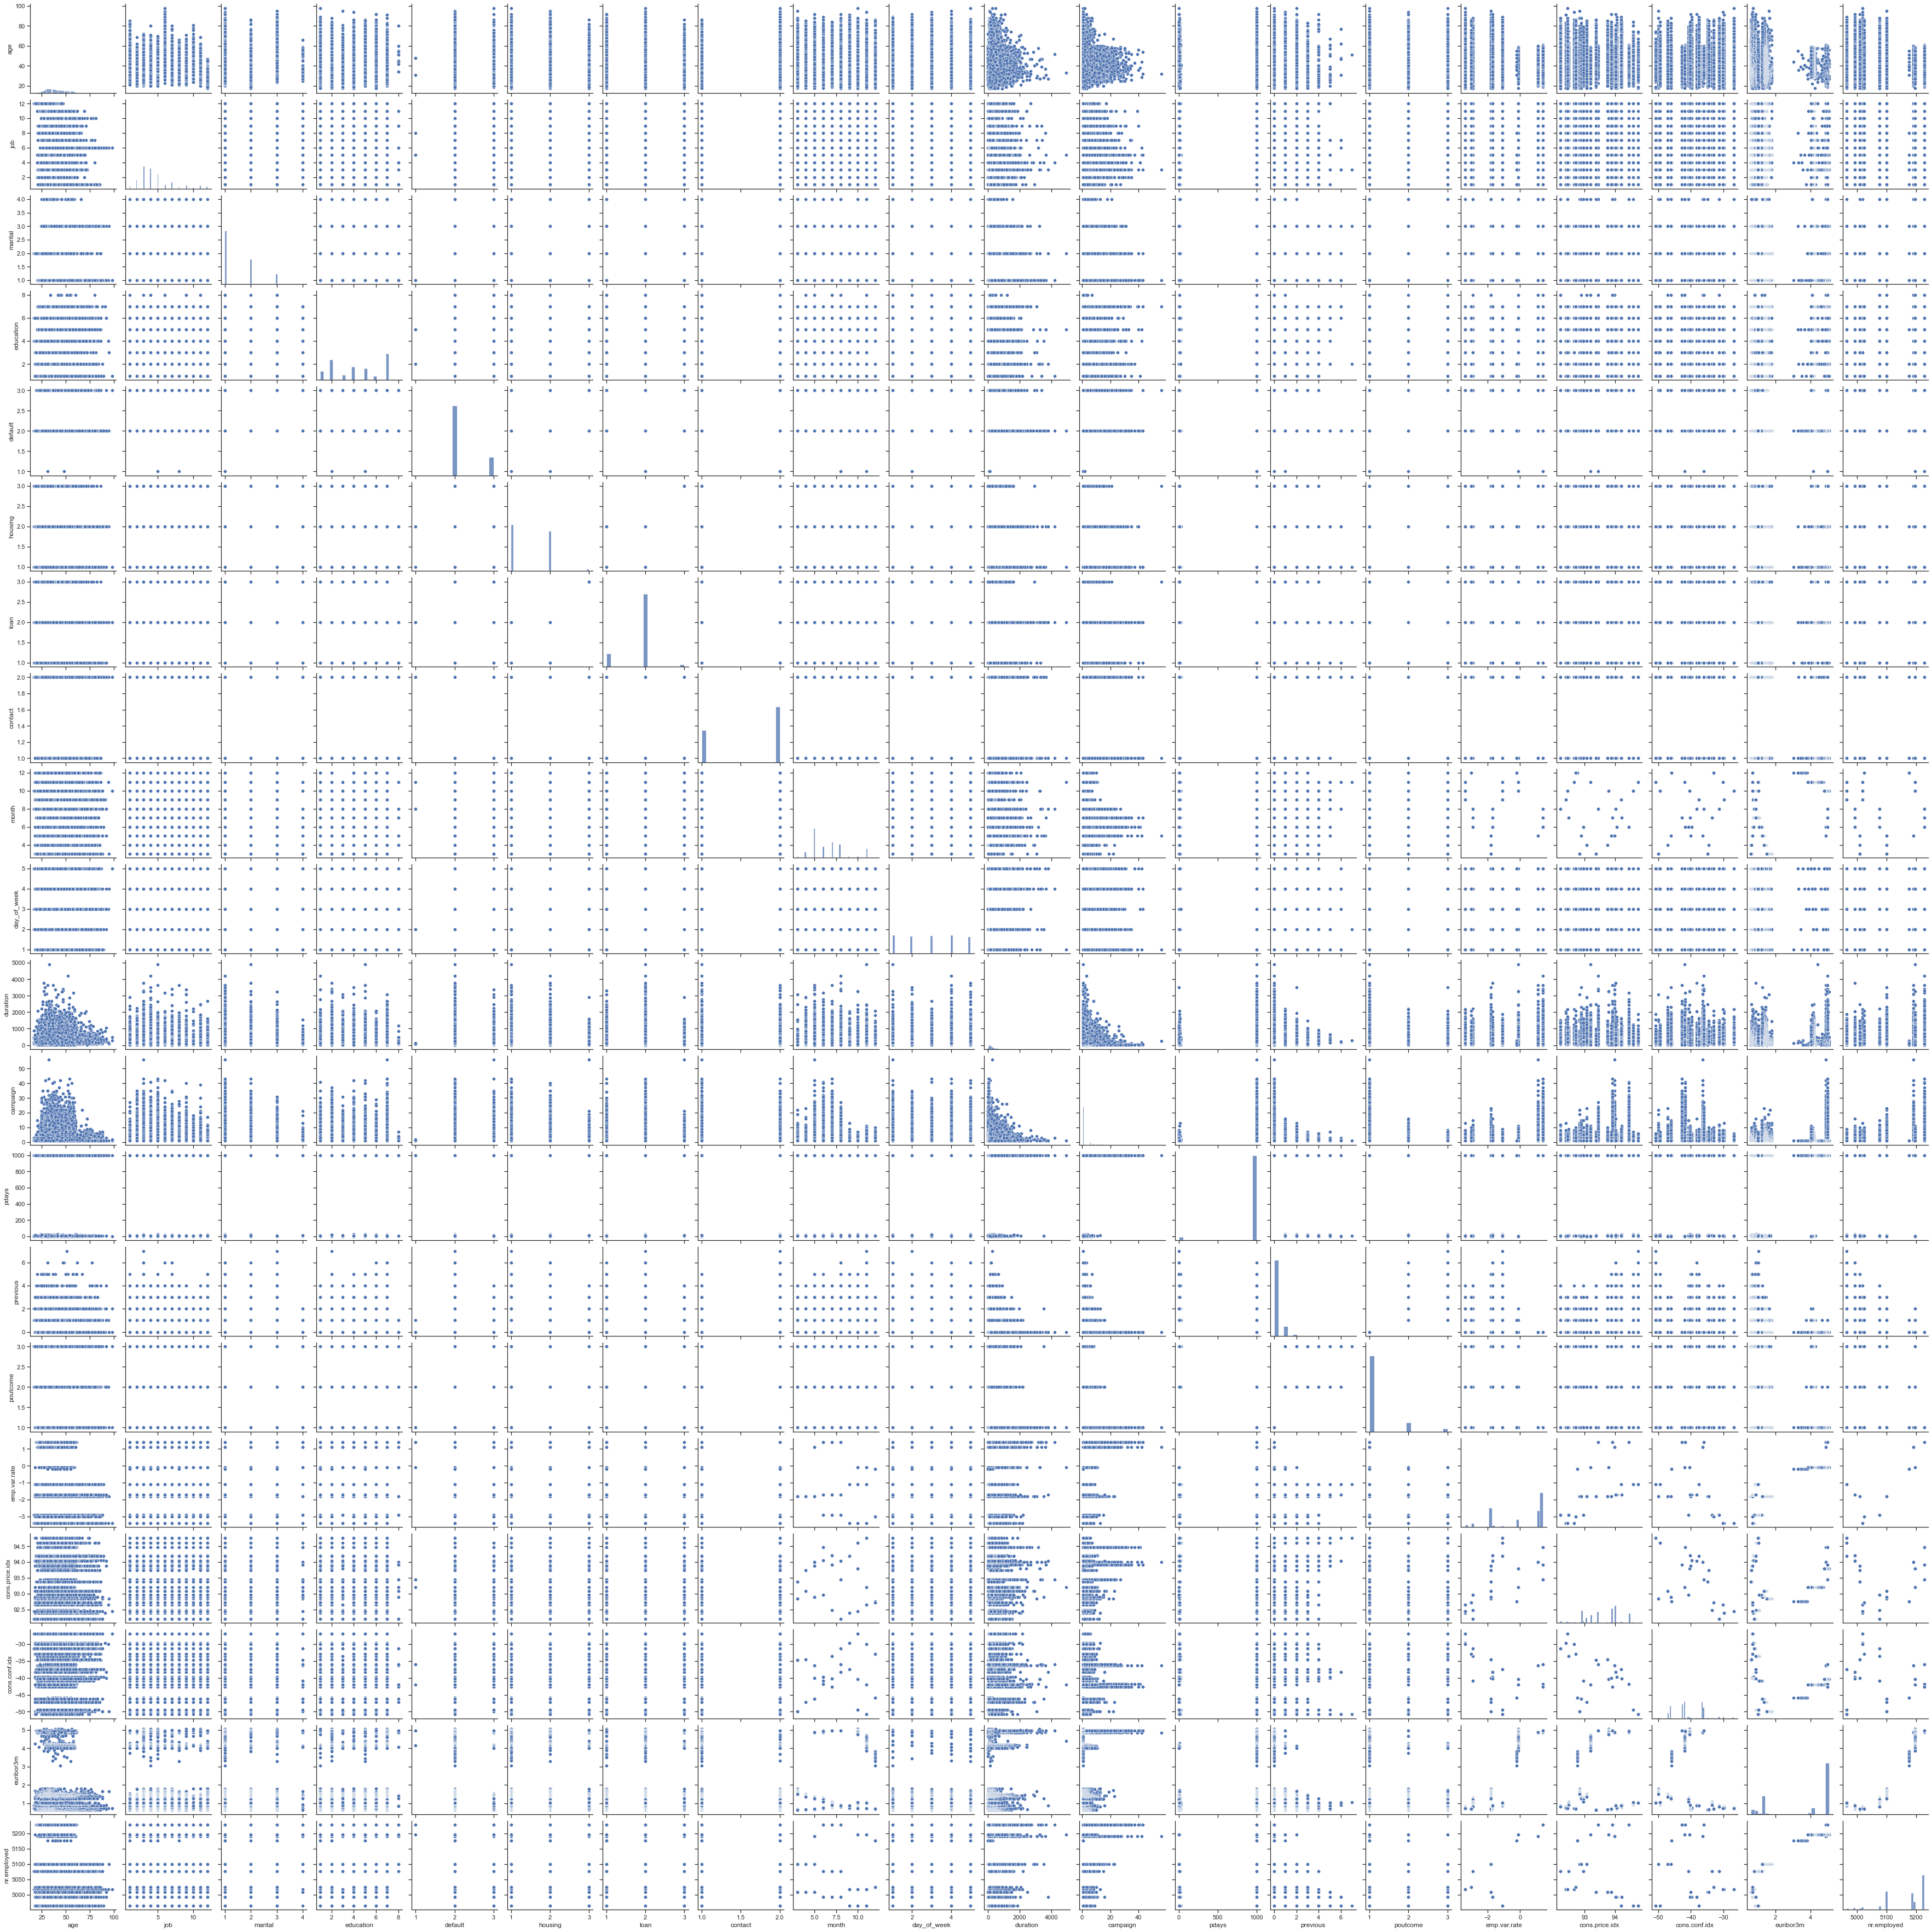

In [67]:
sns.set(style = "ticks")
sns.pairplot(df_final);

### 3.6 Correlation matrix

In [68]:
correl = df.corr()
correl

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


### 3.7 Heatmap between numerical variables

<AxesSubplot:>

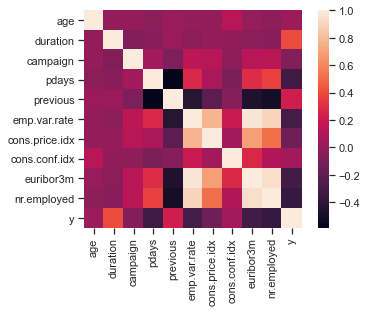

In [69]:
sns.heatmap(correl, square = True)

### 3.8 Dimensionality reduction technique (e.g. PCA)

In [70]:
from sklearn.decomposition import PCA

# Dimesionality reduction to 4
pca = PCA(n_components=4)

# Fitting the model and Transform the explanatory variables X to principal components
principalComponents = pca.fit_transform(df_final)

# Creating a dataframe with 4 principal components
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
print(principal_df)

       principal component 1  principal component 2  principal component 3  \
0                  -0.452294             -39.977448             -17.814974   
1                -112.125700             -31.466721             -17.004580   
2                 -35.351047             -37.354102             -17.569238   
3                -110.132216             -31.650007             -17.024020   
4                  45.413598             -43.470605             -18.143963   
...                      ...                    ...                    ...   
41183              76.749466              -8.878782             206.187854   
41184             125.605212             -12.654348             205.814834   
41185             -67.829488               2.103246             207.220372   
41186             184.433218             -17.139300             205.390647   
41187             -17.974870              -1.658520             206.866378   

       principal component 4  
0                  16.315624  
1

## 4. Creating models

(at least 3 distinct types of models) and tune hyperparameters for each model

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 4.1 Logistic Regression estimation with L1 regularization

In [138]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1, solver='liblinear', penalty='l1')
y_train=y_train.astype('int')
logmodel.fit(X_train,y_train)


LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

Logistic regression does not really have any critical hyperparameters to tune. Logistic Regression estimation with L1 regularization has been perform for hyperparameter tunning.

In [139]:
print(logmodel.coef_, logmodel.intercept_)

[[ 0.08408192 -0.04359036  0.02678997  0.11573181 -0.19318759  0.
   0.04998487  0.40971538 -0.06924183 -0.09106633  1.17309439 -0.16657789
  -0.38825193 -0.13796984 -0.07058378 -1.37753374  0.62249306  0.2101535
   0.3087628  -0.25597568]] [-3.0777465]


### 4.2 Decision Tree Classifier with max_features = 10 and min_samples_leaf=10

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_features = 10, min_samples_leaf=10)

#Fitting the classifier on the training X and y
dtree.fit(X_train, y_train)

#Using the trained classifier to predict labels for the test features
pred = dtree.predict(X_test)

For classification goal minimization of node's heterogeneity (Gini index) has been performed.

### 4.3 Random Forest Classifier with n_estimators=100 and max_features= 10

In [146]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_features= 10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=10)

## 5. Graphical and descriptive model assessment

(e.g. barplots of errors, ROC curves, residual graphs, etc.) and descriptive model assessment (comparing measures picked as performance criteria); remember to choose appropriate measure for the task - RMSE is measure for regression, not classification

### 5.1 Logistic Regression

In [153]:
logpred = logmodel.predict(X_test)
y_test=y_test.astype('int')
confm1 = confusion_matrix(y_test, logpred)
print("Confusion matrix:\n ", confusion_matrix(y_test, logpred),"\n")
CV_1 = round((cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()),3)

print("CV_1: ",logmodel_cross_val_score)

ACC_1= round((confm1[0,0]+confm1[1,1])/(confm1[0,0]+confm1[1,1]+confm1[0,1]+confm1[1,0]),3)
PREC_1 = round((confm1[1,1])/(confm1[1,1]+confm1[0,1]),3)
REC_1 = round((confm1[1,1])/(confm1[1,1]+confm1[1,0]),3)
TNR_1 = round((confm1[0,0])/(confm1[0,0]+confm1[0,1]),3)
F1_1 = round(2*PREC*REC/(PREC+REC),3)
print("ACC_1: ",ACC_1,"\nPREC_1: ",PREC_1,"\nREC_1: ",REC_1,"\nTNR_1: ",TNR_1,"\nF1_1: ",F1_1)

Confusion matrix:
  [[28477   728]
 [ 2212  1534]] 

CV_1:  0.908
ACC_1:  0.911 
PREC_1:  0.678 
REC_1:  0.41 
TNR_1:  0.975 
F1_1:  0.564


### 5.2 Decision Tree Classifier

In [154]:
dtreepred = dtree.predict(X_test)
confm2 = confusion_matrix(y_test, dtreepred)
print("Confusion matrix:\n ",confusion_matrix(y_test, dtreepred),"\n")
CV_2 = round((cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()),3)
confm2 = confusion_matrix(y_test, dtreepred)

print("CV_2: ",dtree_cross_val_score)

ACC_2= round((confm2[0,0]+confm2[1,1])/(confm2[0,0]+confm2[1,1]+confm2[0,1]+confm2[1,0]),3)
PREC_2 = round((confm2[1,1])/(confm2[1,1]+confm2[0,1]),3)
REC_2 = round((confm2[1,1])/(confm2[1,1]+confm2[1,0]),3)
TNR_2 = round((confm2[0,0])/(confm2[0,0]+confm2[0,1]),3)
F1_2 = round(2*PREC*REC/(PREC+REC),3)
print("ACC_2: ",ACC,"\nPREC_2: ",PREC,"\nREC_2: ",REC,"\nTNR_2: ",TNR,"\nF1_2: ",F1)


Confusion matrix:
  [[27996  1209]
 [ 1915  1831]] 

CV_2:  0.898
ACC_2:  0.913 
PREC_2:  0.657 
REC_2:  0.494 
TNR_2:  0.967 
F1_2:  0.564


### 5.3 Random Forest Classifier

In [155]:
rfcpred = rfc.predict(X_test)
confm3 = confusion_matrix(y_test, rfcpred)
print("Confusion matrix:\n ", confusion_matrix(y_test, rfcpred ),"\n")
CV_3 = round((cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()),3)

print("CV_3: ",rfc_cross_val_score)

ACC_3= round((confm3[0,0]+confm3[1,1])/(confm3[0,0]+confm3[1,1]+confm3[0,1]+confm3[1,0]),3)
PREC_3 = round((confm3[1,1])/(confm3[1,1]+confm3[0,1]),3)
REC_3 = round((confm3[1,1])/(confm3[1,1]+confm3[1,0]),3)
TNR_3 = round((confm3[0,0])/(confm3[0,0]+confm3[0,1]),3)
F1_3 = round(2*PREC*REC/(PREC+REC),3)
print("ACC_3: ",ACC,"\nPREC_3: ",PREC,"\nREC_3: ",REC,"\nTNR_3: ",TNR,"\nF1_3: ",F1)

Confusion matrix:
  [[28239   966]
 [ 1897  1849]] 

CV_3:  0.904
ACC_3:  0.913 
PREC_3:  0.657 
REC_3:  0.494 
TNR_3:  0.967 
F1_3:  0.564


### 5.4 ROC Curves

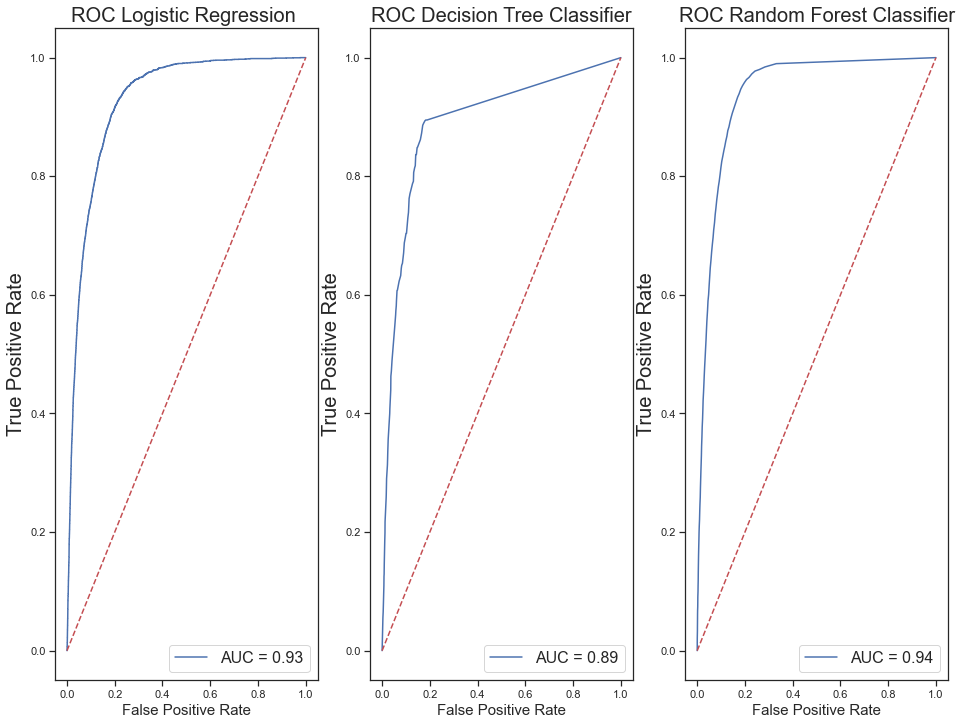

In [149]:
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 1, ncols = 3, figsize = (16,12))

#Logistic regression
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0].plot([0, 1], [0, 1],'r--')
ax_arr[0].set_title('ROC Logistic Regression ',fontsize=20)
ax_arr[0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0].legend(loc = 'lower right', prop={'size': 16})

#Decision Tree Clasifier
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1].plot([0, 1], [0, 1],'r--')
ax_arr[1].set_title('ROC Decision Tree Classifier',fontsize=20)
ax_arr[1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1].legend(loc = 'lower right', prop={'size': 16})


#Random Forest Classifier
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[2].plot([0, 1], [0, 1],'r--')
ax_arr[2].set_title('ROC Random Forest Classifier',fontsize=20)
ax_arr[2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2].legend(loc = 'lower right', prop={'size': 16})



In [158]:
models1 = pd.DataFrame({
                'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
                'CV':  [CV_1, CV_2, CV_3],})

models1.sort_values(by='CV', ascending=False)

,Models,CV
0,Logistic Regression,0.908
2,Random Forest Classifier,0.905
1,Decision Tree Classifier,0.895


In [159]:
models2 = pd.DataFrame({
                'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
                'ACC':  [ACC_1, ACC_2, ACC_3],})

models2.sort_values(by='ACC', ascending=False)

,Models,ACC
2,Random Forest Classifier,0.913
0,Logistic Regression,0.911
1,Decision Tree Classifier,0.905


In [160]:
models3 = pd.DataFrame({
                'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
                'PREC':  [PREC_1, PREC_2, PREC_3],})

models3.sort_values(by='PREC', ascending=False)

,Models,PREC
0,Logistic Regression,0.678
2,Random Forest Classifier,0.657
1,Decision Tree Classifier,0.602


In [161]:
models4 = pd.DataFrame({
                'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
                'REC':  [REC_1, REC_2, REC_3],})

models4.sort_values(by='REC', ascending=False)

,Models,REC
2,Random Forest Classifier,0.494
1,Decision Tree Classifier,0.489
0,Logistic Regression,0.410


In [163]:
models5 = pd.DataFrame({
                'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
                'TNR':  [TNR_1, TNR_2, TNR_3],})

models5.sort_values(by='TNR', ascending=False)

,Models,TNR
0,Logistic Regression,0.975
2,Random Forest Classifier,0.967
1,Decision Tree Classifier,0.959


In [165]:
models6 = pd.DataFrame({
                'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
                'F1':  [F1_1, F1_2, F1_3],})

models6.sort_values(by='F1', ascending=False)

,Models,F1
0,Logistic Regression,0.564
1,Decision Tree Classifier,0.564
2,Random Forest Classifier,0.564


## 6. Summary

Logistic regression, classification decision tree and random forest were used to predict qualitative output of variable y (yes/no).

In the second step of analysis, when exploring the data, it was found that the target variable is imbalanced (89%:11%). It was considered to perform random oversampling or undersampling for imbalanced classification. As random oversampling duplicates examples from the minority class in the training dataset, it can result in overfitting for chosen models. On the other hand, random undersampling deletes examples from the majority class, so it can result in losing information invaluable to models chosen. On the basis of this information, it was not decided to perform any techniques to balance the data.

In the third step encoding categorical variables was performed for further spliting dataset into train and test datasets and standarization.

Performance of machine learning models was assessed. Measures picked as performance criteria were measures derived from confusion metrics:
Cross-validation score (CV) - used for selection of the best set of hyperparameters and for error estimation 
Accuracy (ACC) - percentage of correct predictions
Precision (PREC) - percentage of positive predictions which were actually correct
Recall (REC) - what percentage of actual positives were predicted correctly
Specificity (TNR) - what percentage of actual negatives were predicted correctly
F1 Score (F1) - traditional F-measure or balanced F-score
ROC curve with AUC - ROC represents the probability that a random positive example is positioned to the right of a random negative example. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

Based on the Performance of ROC curve, AUC of three models is around 0.90 which is consider excellent with Random Forest (0.94) performing slightly better than Logistic Regression (0.93) and Decision Tree (0.89). When it comes to confusion matrix measures, based on the performance of Accuracy (0.913) we can conclude Random Forest has also better performance than the Logistic Regression (0.911) and Decision Tree (0.905).

On the other hand, Logistic Regression has a better performance than Random Forest and Decision Tree when it comes to Precision, Specifity and F1 Score. It also performs the best for Cross-validation score.

The assessments results prove that the models selected for prediction perform well for banking marketing data as set out in point 1.4 on rationale behind picking particular tasks.
